In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df = df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

In [4]:
df.columns = ['age', 'job','marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day','month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [6]:
#df.job.replace('"',"")
df = df.replace('"', '', regex=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [8]:
new_df = df[['age', 'job','marital', 'education', 'balance', 'housing', 'contact', 'day','month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

In [9]:
df = new_df.copy()

In [10]:
df[['age', 'balance' , 'day' , 'duration' , 'pdays', 'previous' ,'campaign']] = df[['age', 'balance' , 'day' , 'duration' , 'pdays', 'previous', 'campaign']].astype(int)

In [11]:
#Target encoding

df.y = (df.y == 'yes').astype(int)

In [12]:
from sklearn.model_selection import train_test_split

df_train_full , df_test = train_test_split(df,test_size=.2 , random_state=1)
df_train , df_val = train_test_split(df_train_full,test_size=.25 , random_state=1)

In [13]:
len(df) *.6 ,len(df_test) ,len(df_val) , len(df_train)

(27126.6, 9043, 9042, 27126)

In [14]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_test['y']
del df_val['y']

In [15]:
df_train_full.y.mean()

np.float64(0.11720305242203052)

In [16]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
numerical_cols = df_train.select_dtypes(include=['number']).columns
categorical = list(categorical_cols)
numerical = list(numerical_cols)

In [17]:
from sklearn.metrics import roc_auc_score
# Initialize a dictionary to store AUC values
auc_values = {}

# Compute AUC for each numerical variable
for var in  numerical:
    # Use the variable as score and compute AUC with the y variable
    auc = roc_auc_score(y_train,df_train[var])

    # If AUC is < 0.5, invert the variable
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[var])
        auc_values[var] = -auc
    else:
        auc_values[var] = auc

# Determine which numerical variable has the highest AUC
max_auc_var = max(auc_values, key=auc_values.get)

print(f'The numerical variable with the highest AUC is : {max_auc_var} with an AUC of {auc_values[max_auc_var]}')


The numerical variable with the highest AUC is : duration with an AUC of 0.8147002759670778


In [18]:
auc_values

{'age': np.float64(-0.512185717527344),
 'balance': np.float64(0.5888313805382317),
 'day': np.float64(-0.525957882383908),
 'duration': np.float64(0.8147002759670778),
 'campaign': np.float64(-0.5714543015682159),
 'pdays': np.float64(0.5901276247352144),
 'previous': np.float64(0.5985653242764153)}

duration:
If the AUC is high, it means that the duration of the campaign is a good indicator of whether the client will subscribe to a term deposit.  the AUC is 0.8, it means that the duration of the campaign has some effect on subscription behavior.






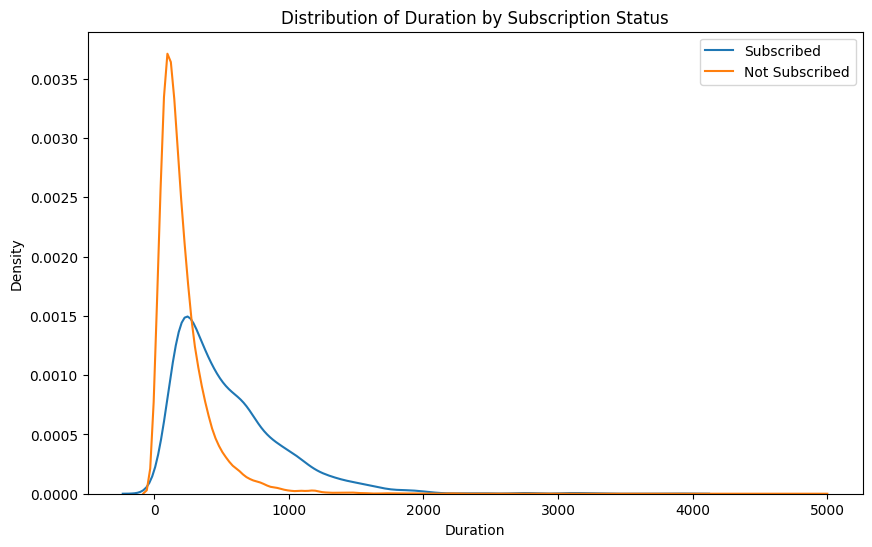

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_train.loc[y_train==1, 'duration'], label='Subscribed')
sns.kdeplot(df_train.loc[y_train==0, 'duration'], label='Not Subscribed')
plt.title('Distribution of Duration by Subscription Status')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\malia\AppData\Local\Temp\ipykernel_17004\962191039.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_train.loc[y_train==1, 'duration'], df_train.loc[y_train==0, 'duration']], labels=['Subscribed', 'Not Subscribed'])


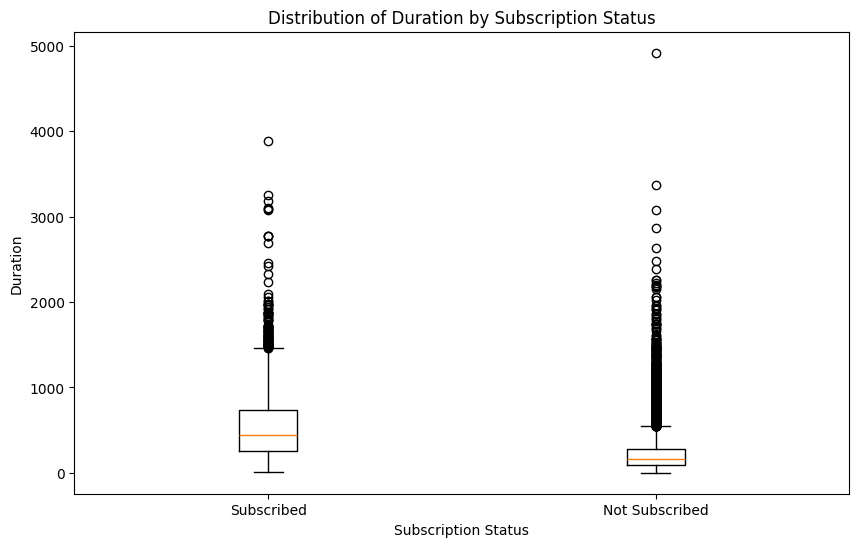

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df_train.loc[y_train==1, 'duration'], df_train.loc[y_train==0, 'duration']], labels=['Subscribed', 'Not Subscribed'])
plt.title('Distribution of Duration by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Duration')
plt.show()

In [21]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'job': 'entrepreneur',
 'marital': 'married',
 'education': 'tertiary',
 'housing': 'no',
 'contact': 'cellular',
 'month': 'jul',
 'poutcome': 'unknown',
 'age': 56,
 'balance': 40,
 'day': 11,
 'duration': 123,
 'campaign': 2,
 'pdays': -1,
 'previous': 0}

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [23]:
X_train.shape

(27126, 47)

In [24]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [27]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [28]:
model.predict_proba(X_val)


array([[0.97084154, 0.02915846],
       [0.97632839, 0.02367161],
       [0.97849513, 0.02150487],
       ...,
       [0.76009282, 0.23990718],
       [0.99777343, 0.00222657],
       [0.96141029, 0.03858971]])

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]

In [30]:
class1 = y_pred >=  0.5

In [31]:
accutacy_all_features = (y_val == class1).mean()
accutacy_all_features

np.float64(0.8974784339747843)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np


fpr, tpr, thresholds = roc_curve(y_val, y_pred)
np.round(auc(fpr, tpr) ,3)

np.float64(0.901)

In [33]:
from sklearn.metrics import confusion_matrix
# Set a threshold (e.g. 0.5)
threshold = 0.5

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_val, y_pred_binary)
print(cm)

[[7753  191]
 [ 736  362]]


In [34]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)

print(precision)
print(recall)

0.6546112115732369
0.3296903460837887


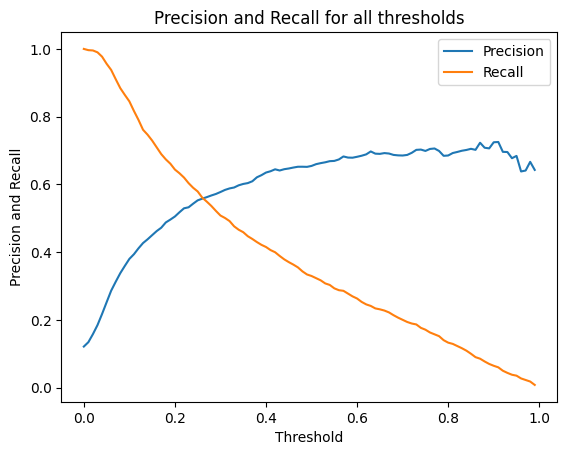

F1 is maximal at threshold 0.2200 with F1 score 0.57


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0, 1, 0.01)
precisions = []
recalls = []
f1_scores = []
for threshold in thresholds:
    y_pred = (model.predict_proba(X_val)[:, 1] >= threshold).astype(int)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1score = f1_score(y_val, (y_pred >= threshold).astype(int))
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

import matplotlib.pyplot as plt

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall for all thresholds')
plt.legend()
plt.show()

# find the threshold where F1 is maximal
max_f1_idx = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_idx]
max_f1_score = f1_scores[max_f1_idx]

print(f"F1 is maximal at threshold {max_f1_threshold:.4f} with F1 score {max_f1_score:.2f}")

In [36]:
intersection_idx = np.argmin(np.abs(np.array(precisions) - np.array(recalls)) )
intersection_threshold = thresholds[intersection_idx]
print(f"Precision and Recall intersect at threshold {intersection_threshold:.3f}")

Precision and Recall intersect at threshold 0.260


In [37]:
# find the threshold where F1 is maximal
max_f1_idx = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_idx]
max_f1_score = f1_scores[max_f1_idx]

print(f"F1 is maximal at threshold {max_f1_threshold:.4f} with F1 score {max_f1_score:.2f}")

F1 is maximal at threshold 0.2200 with F1 score 0.57


In [38]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [39]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

C:\Users\malia\anaconda3\envs\ml-zoomcamp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
  df_train = df_train_full.iloc[train_idx]
  df_val = df_train_full.iloc[val_idx]

  y_train = df_train.y.values
  y_val = df_val.y.values

  dv, model = train(df_train, y_train, C=1.0)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for C in tqdm([0.000001, 0.001, 1]):

  scores = []

  for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

  print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 33%|████████████████████████████                                                        | 1/3 [00:02<00:05,  2.99s/it]

C=1e-06 0.701 +- 0.009


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.28s/it]

C=0.001 0.861 +- 0.007


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.50s/it]

C=1 0.906 +- 0.006
